In [2]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib as plt


In [3]:
# Create a set of random latitude and longitute combinations:

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to show the lat and long combinations

for coordinate in coordinates:
    print(coordinate[0],coordinate[1])
    

87.55438920349107 167.14553450028546
-72.13582421059077 141.00459342039528
80.25088197028586 -170.62156202446994
5.733386832011391 -52.62621823424571
2.218389032143506 78.96624737357581
37.218664942893724 -88.37321533591907
-43.51636646484352 15.708643215670662
-30.413409222014614 -102.70252809720209
-69.76029484654501 -110.68144357991423
-16.7132566424324 -91.11621812170654
40.44999278810394 122.85079986879003
-36.97319292066521 94.34871775665795
48.81689323473461 -14.964284999018986
85.51086605342292 -15.22294108590657
51.720614091625976 -2.1801786052500916
-16.443317651055906 31.823107814679275
-73.3438477118987 -11.828593741075906
54.14842376913998 168.0433614841225
54.894421565715845 -51.58262095563674
8.522530017288119 154.62971809348556
-20.14489469311421 157.33018412046079
-17.830331348035116 -95.28504315253844
-83.63420850866669 125.21522832011794
-67.46502904487156 -162.89739064036485
22.42022576776688 41.261869052029425
38.96527963582099 -2.065200595920942
52.04101435932711 

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

593

In [9]:
# Import the requests library:

import requests

# Import the API key
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Import the time library and datetima module

import time
from datetime import datetime

In [10]:
# Create an empty lsit to hold the weather data:

city_data = []

# Print the beginning of the logging:

print("Beginning Data Retrieval    ")
print("-------------")

# create counters:

record_count = 1
set_count = 1

# loop through cities in the list:

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count+= 1
        record_count =1 
        time.sleep(60)
        
    # Create endpoint URL with each city:
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    
# Run an API request for each of the cities:

    try:
        # Parse the JSON and retrieve DATA:
        city_weather = requests.get(city_url).json()
        # parse out the needed DATA:
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date for ISO standard:

        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d- %H:%M;%S')

        # Append the city information into the city_data list:

        city_data.append({"City": city.title(),
                         "Lat" : city_lat,
                         "lng" : city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error occurs, skip the city:
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete:

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
-------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | burica
City not found. Skipping...
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | antofagasta
Processing Record 7 of Set 1 | rawson
Processing Record 8 of Set 1 | zyryanka
Processing Record 9 of Set 1 | yurty
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | abha
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | lieksa
Processing Record 15 of Set 1 | pangody
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing R

Processing Record 36 of Set 4 | broome
Processing Record 37 of Set 4 | kishi
Processing Record 38 of Set 4 | tawkar
City not found. Skipping...
Processing Record 39 of Set 4 | manacapuru
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | basco
Processing Record 45 of Set 4 | raton
Processing Record 46 of Set 4 | wanning
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | tateyama
Processing Record 49 of Set 4 | san andres
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | plastun
Processing Record 4 of Set 5 | mlonggo
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | jiayuguan
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | constitucion
Processing

Processing Record 28 of Set 8 | san jeronimo
Processing Record 29 of Set 8 | union de san antonio
Processing Record 30 of Set 8 | constantine
Processing Record 31 of Set 8 | tuam
Processing Record 32 of Set 8 | abeokuta
Processing Record 33 of Set 8 | marystown
Processing Record 34 of Set 8 | praid
Processing Record 35 of Set 8 | teya
Processing Record 36 of Set 8 | acajutla
Processing Record 37 of Set 8 | mantua
Processing Record 38 of Set 8 | alenquer
Processing Record 39 of Set 8 | thai binh
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | murray bridge
Processing Record 42 of Set 8 | vzmorye
Processing Record 43 of Set 8 | morondava
Processing Record 44 of Set 8 | aksarka
Processing Record 45 of Set 8 | rio grande
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set 8 | lithgow
Processing Record 48 of Set 8 | sao felix do xingu
Processing Record 49 of Set 8 | fernley
Processing Record 50 of Set 8 | coahuayana
Processing Record 1 of Set 9 | pra

Processing Record 17 of Set 12 | mogadishu
Processing Record 18 of Set 12 | chino valley
Processing Record 19 of Set 12 | frisco
Processing Record 20 of Set 12 | saleaula
City not found. Skipping...
Processing Record 21 of Set 12 | george town
Processing Record 22 of Set 12 | azimur
City not found. Skipping...
Processing Record 23 of Set 12 | ituni
City not found. Skipping...
Processing Record 24 of Set 12 | barentu
Processing Record 25 of Set 12 | massaguet
Processing Record 26 of Set 12 | macia
Processing Record 27 of Set 12 | copiapo
Processing Record 28 of Set 12 | kangaatsiaq
Processing Record 29 of Set 12 | wewak
Processing Record 30 of Set 12 | kholodnyy
Processing Record 31 of Set 12 | yarim
Processing Record 32 of Set 12 | kavaratti
Processing Record 33 of Set 12 | santa rosa
Processing Record 34 of Set 12 | sabang
Processing Record 35 of Set 12 | stamsund
City not found. Skipping...
Processing Record 36 of Set 12 | villefontaine
Processing Record 37 of Set 12 | gunjur
Process

In [11]:
len(city_data)

542

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,55.31,91,100,4.00,ZA,2022-07-21- 00:03;07
1,Tuktoyaktuk,69.4541,-133.0374,45.12,87,100,9.15,CA,2022-07-21- 00:01;53
2,Airai,-8.9266,125.4092,63.37,80,89,3.76,TL,2022-07-21- 00:03;08
3,Pacific Grove,36.6177,-121.9166,79.25,82,40,11.50,US,2022-07-21- 00:02;56
4,Antofagasta,-23.6500,-70.4000,56.97,82,90,1.30,CL,2022-07-21- 00:00;12
5,Rawson,-43.3002,-65.1023,44.65,39,67,27.78,AR,2022-07-21- 00:00;57
6,Zyryanka,65.7500,150.8500,56.70,48,68,5.73,RU,2022-07-21- 00:03;09
7,Yurty,56.0498,97.6348,61.20,68,65,4.05,RU,2022-07-21- 00:03;09
8,Abha,18.2164,42.5053,64.65,68,20,9.22,SA,2022-07-21- 00:03;10
9,Chuy,-33.6971,-53.4616,57.02,94,17,7.31,UY,2022-07-21- 00:03;10


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2022-07-21- 00:03;07,-33.9180,25.5701,55.31,91,100,4.00
1,Tuktoyaktuk,CA,2022-07-21- 00:01;53,69.4541,-133.0374,45.12,87,100,9.15
2,Airai,TL,2022-07-21- 00:03;08,-8.9266,125.4092,63.37,80,89,3.76
3,Pacific Grove,US,2022-07-21- 00:02;56,36.6177,-121.9166,79.25,82,40,11.50
4,Antofagasta,CL,2022-07-21- 00:00;12,-23.6500,-70.4000,56.97,82,90,1.30
5,Rawson,AR,2022-07-21- 00:00;57,-43.3002,-65.1023,44.65,39,67,27.78
6,Zyryanka,RU,2022-07-21- 00:03;09,65.7500,150.8500,56.70,48,68,5.73
7,Yurty,RU,2022-07-21- 00:03;09,56.0498,97.6348,61.20,68,65,4.05
8,Abha,SA,2022-07-21- 00:03;10,18.2164,42.5053,64.65,68,20,9.22
9,Chuy,UY,2022-07-21- 00:03;10,-33.6971,-53.4616,57.02,94,17,7.31


In [15]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Get relevant fields from the DF for plotting purposes:

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



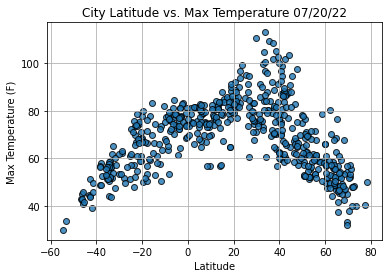

In [17]:
# Import time module

import time
import matplotlib.pyplot as plt

# Scatter Plot building:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties:

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph:

plt.savefig("weather_data/Fig1.png")

# Show plot:

plt.show()

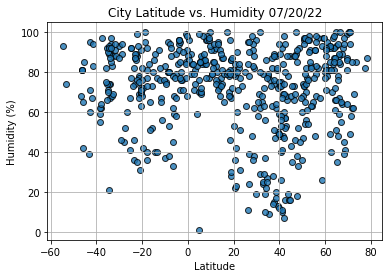

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

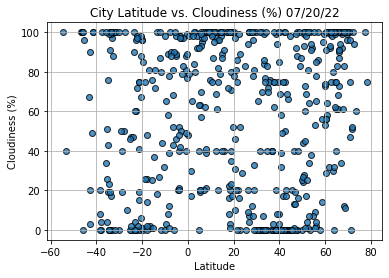

In [19]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

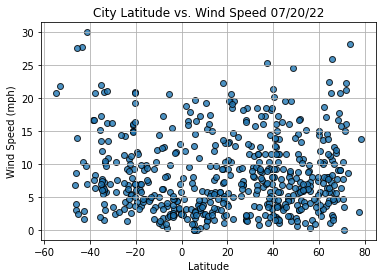

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [21]:
# Import linregress

from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tuktoyaktuk,CA,2022-07-21- 00:01;53,69.4541,-133.0374,45.12,87,100,9.15
3,Pacific Grove,US,2022-07-21- 00:02;56,36.6177,-121.9166,79.25,82,40,11.50
6,Zyryanka,RU,2022-07-21- 00:03;09,65.7500,150.8500,56.70,48,68,5.73
7,Yurty,RU,2022-07-21- 00:03;09,56.0498,97.6348,61.20,68,65,4.05
8,Abha,SA,2022-07-21- 00:03;10,18.2164,42.5053,64.65,68,20,9.22


In [24]:
# Creating the two Northern and Southern Hemisphere DATAFRAME"

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

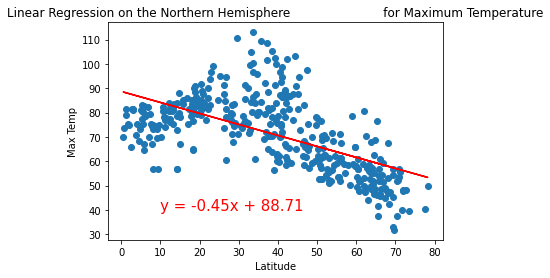

In [33]:
#  Northern Hemisphere Linear Regression:

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function:

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))


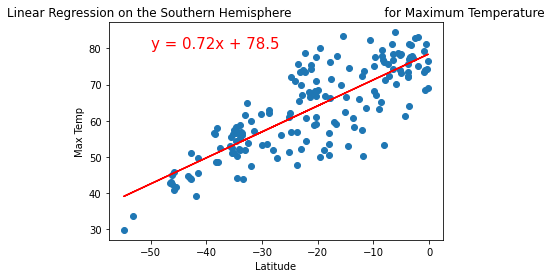

In [39]:
#  southern Hemisphere Linear Regression:

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function:

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,80))


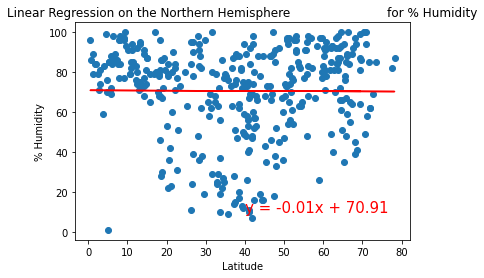

In [40]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

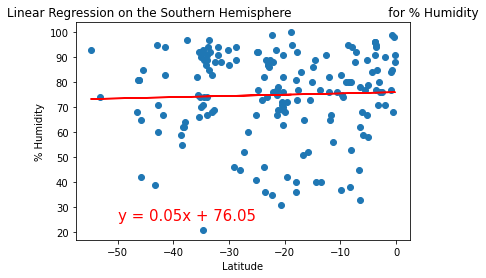

In [46]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

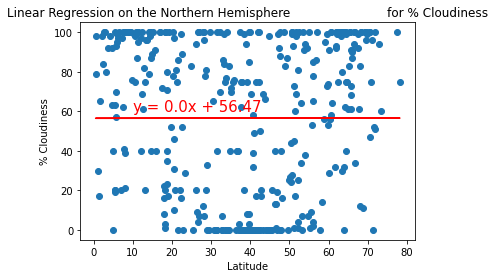

In [49]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

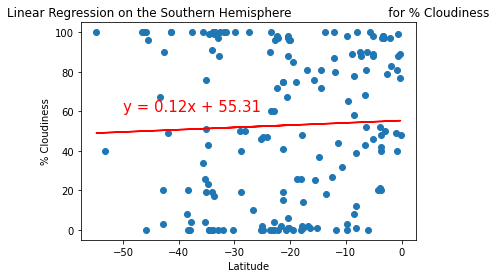

In [50]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

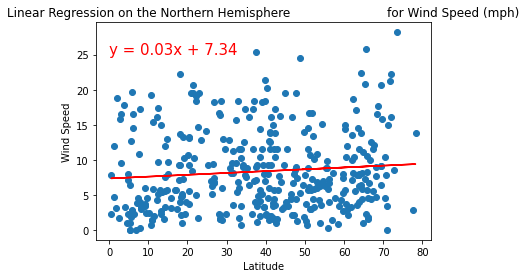

In [55]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed',(0,25))

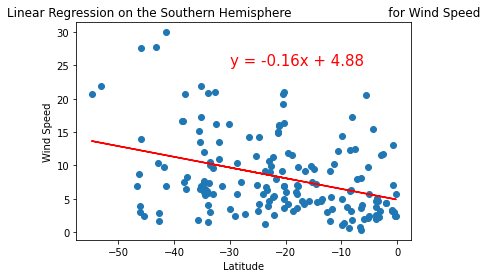

In [58]:
# Linear regression on the Southern Hemisphere:

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,25))